In [200]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [201]:
def plot_dots_on_image(image_path, label_file):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Read the label file and extract coordinates
    with open(label_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        # Extract coordinates from each line, ignoring the last two columns
        coords = line.split()[:-2]
        coords = [float(coord) for coord in coords]

        # Calculate the center point of each bounding box
        x_center = (coords[0] + coords[4]) / 2
        y_center = (coords[1] + coords[5]) / 2
        print("center: ", x_center, y_center)
        
        # Draw a circle at the center point
        cv2.circle(image, (int(x_center), int(y_center)), radius=3, color=(0, 255, 0), thickness=-2)
        
        # Draw the bounding box using polylines
        pts = np.array([[int(coords[i]), int(coords[i + 1])] for i in range(0, len(coords), 2)], np.int32)
        pts = pts.reshape((-1, 1, 2))  # Reshape to the required shape for polylines
        cv2.polylines(image, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

    
    
    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


center:  725.0 447.0
center:  728.0 471.0
center:  727.0 497.5
center:  725.5 459.5
center:  727.0 484.5
center:  726.5 508.5


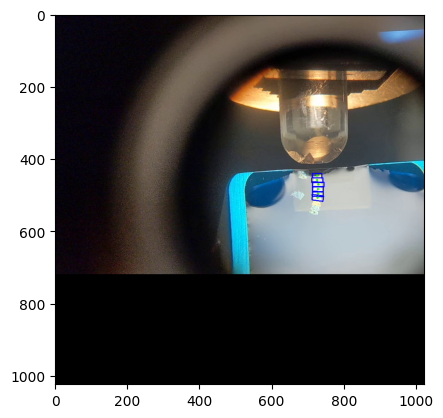

In [202]:
# image_path = '/home/sky/datasets/obb/images/video_1_0500.jpg'
# label_file = '/home/sky/datasets/obb/labelTxt/video_1_0500.txt'
image_path = '/home/sky/yolov5_obb/dataset/obb_rate1.0_split1024_gap200/images/video_0_0001__1__0___0.jpg'
label_file = '/home/sky/yolov5_obb/dataset/obb_rate1.0_split1024_gap200/labelTxt/video_0_0001__1__0___0.txt'
plot_dots_on_image(image_path, label_file)

Center:  725 447 26 12
Top Left:  712 441 26 12


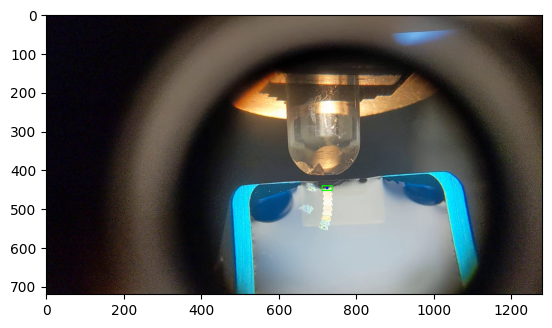

In [203]:
import cv2
import matplotlib.pyplot as plt

# Function to convert normalized coordinates to pixel coordinates
def convert_normalized_to_pixels(center_x_norm, center_y_norm, width_norm, height_norm, img_width, img_height):
    center_x = int(center_x_norm * img_width)
    center_y = int(center_y_norm * img_height)
    width = int(width_norm * img_width)
    height = int(height_norm * img_height)
    print("Center: ", center_x, center_y, width, height)
    
    
    # Calculate the top-left corner of the box
    top_left_x = center_x - width // 2
    top_left_y = center_y - height // 2

    # Ensure the box stays within the image boundaries
    top_left_x = max(0, min(img_width, top_left_x))
    top_left_y = max(0, min(img_height, top_left_y))

    return top_left_x, top_left_y, width, height

# Normalized coordinates for center_x, center_y, width, and height of the box
center_x_norm = 0.5668160860655739
center_y_norm = 0.6217461500248384
width_norm = 0.020454545454545503
height_norm = 0.016666666666666667

# Image dimensions
img_width, img_height = 1280, 720

# Image path
image_path = '/home/sky/datasets/training_set_1/images/val/frame_0001.jpg'

# Convert normalized coordinates to pixels
top_left_x, top_left_y, width, height = convert_normalized_to_pixels(center_x_norm, center_y_norm, width_norm, height_norm, img_width, img_height)
center_x = int(center_x_norm * img_width)
center_y = int(center_y_norm * img_height)
# Read the image
image = cv2.imread(image_path)
print("Top Left: ", top_left_x, top_left_y, width, height)
# Draw a rectangle on the image
cv2.circle(image, (center_x, center_y), radius=3, color=(255, 0, 0), thickness=-2)
cv2.rectangle(image, (top_left_x, top_left_y), (top_left_x + width, top_left_y + height), (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
